Feature Names: ['sepal length (cm)', 'sepal width (cm)']
Target Names: ['setosa' 'versicolor' 'virginica']


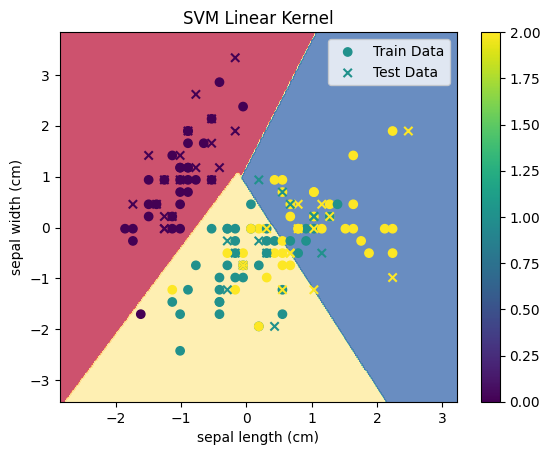

Accuracy on training data: 0.7904761904761904
Accuracy on test data: 0.7333333333333333


In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import datasets
import matplotlib.pyplot as plt

# Load Iris dataset and use only the first two features
iris = datasets.load_iris()
X = iris.data[:, :2]  # Selecting the first two features
Y = iris.target

# Display dataset info
print("Feature Names:", iris.feature_names[:2])  # Only the selected features
print("Target Names:", iris.target_names)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVM model
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Mesh grid for decision boundary visualization
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot decision boundary and data points
plt.contourf(xx, yy, Z, cmap='Spectral', alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', label='Train Data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='x', label='Test Data')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('SVM Linear Kernel')
plt.colorbar()
plt.legend()
plt.show()

# Evaluate model accuracy
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Accuracy on training data: {train_accuracy}')
print(f'Accuracy on test data: {test_accuracy}')